## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets,metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
data=datasets.load_boston()
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.25,random_state=1)
tree=DecisionTreeRegressor(min_samples_leaf=2)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print('r2_score:%.4f'%metrics.r2_score(y_test,y_pred))
print('MSE: %.4f' %metrics.mean_squared_error(y_test,y_pred))

r2_score:0.8475
MSE: 15.1055


In [3]:
data=datasets.load_wine()
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.25,random_state=1)
tree=DecisionTreeClassifier(criterion='entropy',min_samples_split=3)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print('accuracy_score:%.4f'%metrics.accuracy_score(y_test,y_pred))

accuracy_score:0.9556


C:\Users\qishi shi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


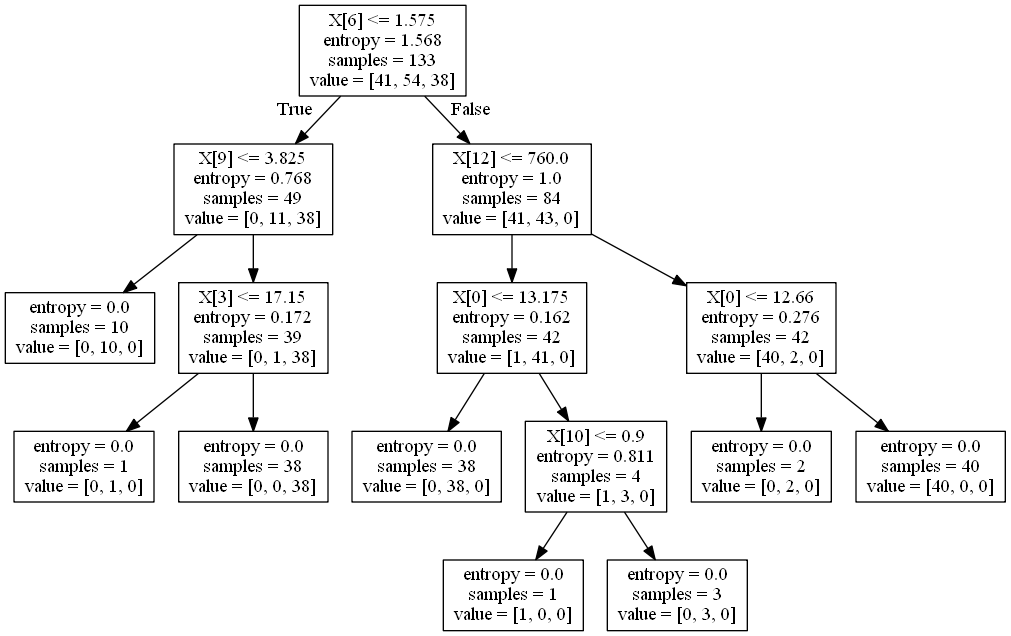

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())